In [1]:
import pandas as pd
import os
import sys
sys.path.append('../code/analysis')
from visualize_single_feature import SingleFeatureVisualizer

In [2]:
!ls ../data/raw/preliminary_contest_data/

adFeature.csv  test1.csv  train.csv  userFeature.data


In [3]:
DATA_DIR = '../data/raw/preliminary_contest_data/'


def load(filename, **kw):
    return pd.read_csv(os.path.join(DATA_DIR, filename), **kw)

In [4]:
df_ad = load("adFeature.csv", engine="python")
df_train = load("train.csv", engine="python")  # there is some problem
df_test = load("test1.csv", engine="python")

In [5]:
print("ad shape: {}".format(df_ad.shape))
print("ad columns: {}".format(df_ad.columns.tolist()))

ad shape: (173, 8)
ad columns: ['aid', 'advertiserId', 'campaignId', 'creativeId', 'creativeSize', 'adCategoryId', 'productId', 'productType']


In [6]:
col_name = 'creativeSize'
col = df_ad[col_name]
print("nunique: {}".format(col.nunique()))
print("unique : {}".format(col.unique()))
print("summary")
print("-------")
print(col.describe())

nunique: 15
unique : [ 59  53  35  22  42 100  91  95  93  20 105 109  77  79  60]
summary
-------
count    173.000000
mean      50.364162
std       24.827317
min       20.000000
25%       35.000000
50%       42.000000
75%       59.000000
max      109.000000
Name: creativeSize, dtype: float64


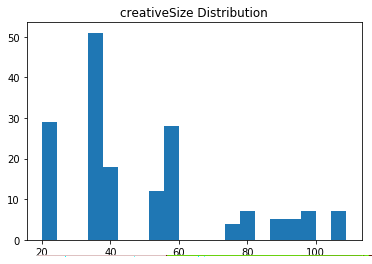

In [7]:
SingleFeatureVisualizer.plot_numerical_feat(col, col_name, bins=20)

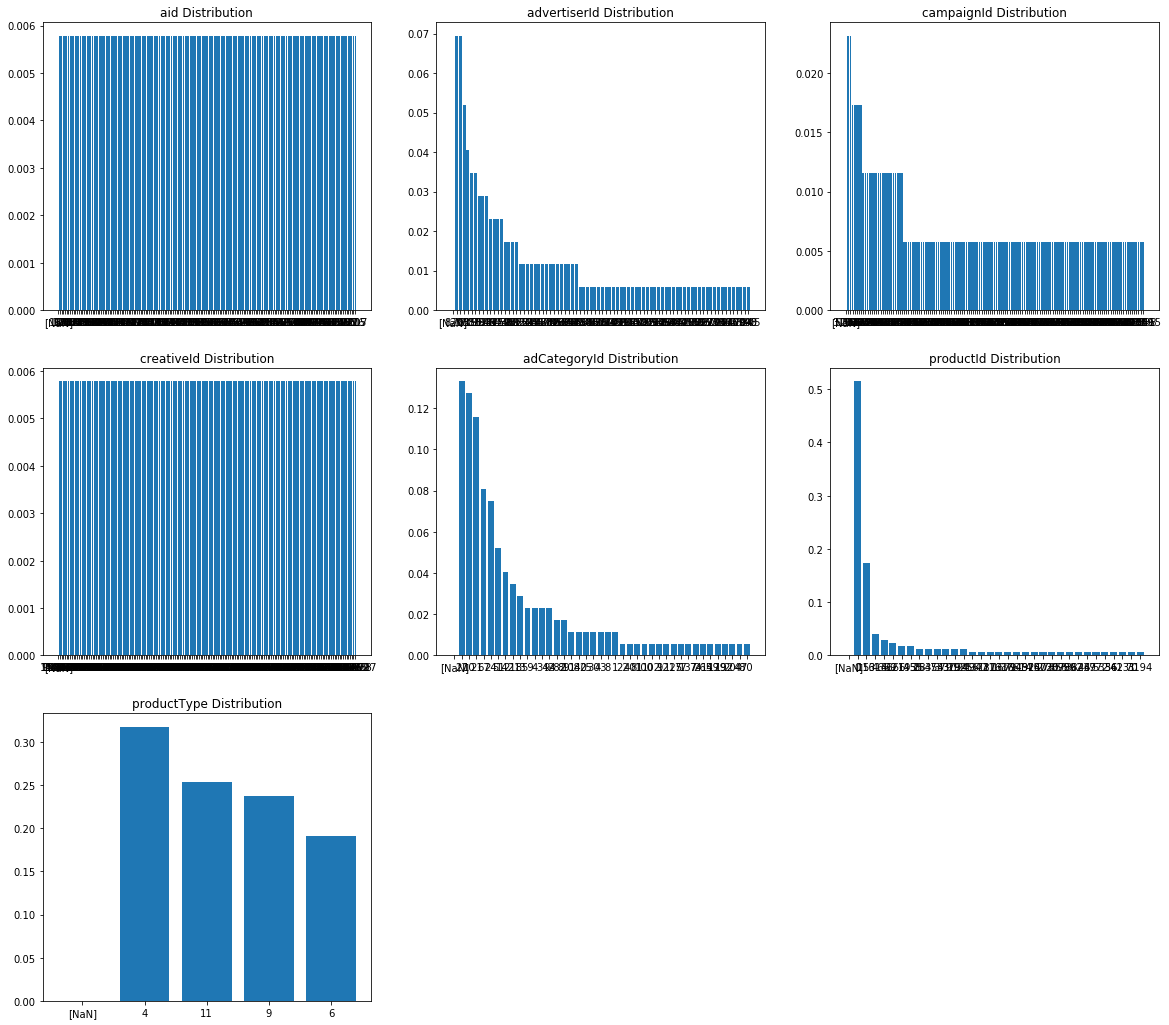

In [8]:
cat_cols = df_ad.drop([col_name], axis=1).columns.tolist()
for cat_col in cat_cols:
    df_ad[cat_col] = df_ad[cat_col].apply(str).astype("category")
SingleFeatureVisualizer.plot_categorical_feats(df_ad, cat_cols)

In [9]:
print("ad NaN Count")
print("------------")
print(df_ad.isnull().sum())  # No NaN, good

ad NaN Count
------------
aid             0
advertiserId    0
campaignId      0
creativeId      0
creativeSize    0
adCategoryId    0
productId       0
productType     0
dtype: int64


In [10]:
print("test shape: {}".format(df_test.shape))
print("test columns: {}".format(df_test.columns.tolist()))

test shape: (2265989, 2)
test columns: ['aid', 'uid']


In [11]:
for cat_col in df_test.columns:
    msg = "test {} Unique Value Counts".format(cat_col)
    print(msg)
    print("-" * len(msg))
    print(df_test[cat_col].value_counts())
    print()

test aid Unique Value Counts
----------------------------
692     142959
1119    101222
411      95782
1468     84961
1291     70546
561      63088
1918     62398
1566     54373
191      53758
1415     46989
914      46741
70       46015
1605     41107
1379     36786
136      36514
2031     32509
117      32448
846      30903
1407     30199
1530     29011
389      27320
916      23986
302      23758
1950     23711
2118     23579
1017     22030
1377     21984
1749     21449
1827     20962
311      20792
         ...  
886       2617
1842      2551
1027      2550
671       2513
1871      2446
903       2196
1580      2178
205       2159
1335      2124
450       2113
1847      2111
1507      2111
2196      2061
875       1975
1057      1967
2154      1953
272       1926
516       1888
951       1882
975       1866
1429      1854
1085      1831
927       1797
313       1765
1925      1756
1746      1756
336       1753
838       1710
1242      1672
1351      1657
Name: aid, Length: 173, dty

In [12]:
print("train shape: {}".format(df_train.shape))
print("train columns: {}".format(df_train.columns.tolist()))

train shape: (8798814, 3)
train columns: ['aid', 'uid', 'label']


In [13]:
print(df_train.head(5))

    aid       uid  label
0   699  78508957     -1
1  1991   3637295     -1
2  1119  19229018     -1
3  2013  79277120     -1
4   692  41528441     -1


In [14]:
cat_cols = ['aid', 'uid']
for cat_col in cat_cols:
    msg = "train {} Unique Value Counts".format(cat_col)
    print(msg)
    print("-" * len(msg))
    print(df_train[cat_col].value_counts())
    print()

train aid Unique Value Counts
-----------------------------
692     553109
1119    392531
411     372787
1468    329152
1291    276310
561     244151
1918    241755
1566    211522
191     208786
1415    182716
914     179670
70      178444
1605    160011
1379    141733
136     140882
117     126933
2031    126853
846     119435
1407    118166
1530    112370
389     104636
916      93276
302      92284
1950     91864
2118     91387
1017     86516
1377     86107
1749     82076
1827     81287
311      80505
         ...  
886      10216
1027      9927
1842      9850
671       9498
1871      9441
1580      8665
205       8335
903       8288
1847      8259
1335      8167
450       8134
2196      8099
1507      7989
875       7676
1429      7668
1057      7625
2154      7624
951       7497
516       7472
272       7442
975       7304
1085      7194
336       7096
927       7068
313       7031
1746      6886
838       6842
1242      6757
1351      6723
1925      6624
Name: aid, Length: 173, d

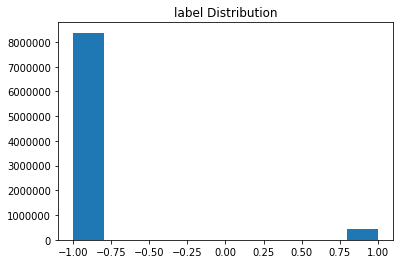

In [15]:
col_name = 'label'
col = df_train[col_name]
SingleFeatureVisualizer.plot_numerical_feat(col, col_name)

In [16]:
conv_rate = col[col == 1].sum() / len(col)
print("Rate: {}".format(conv_rate))

Rate: 0.047956576875019745
